In [45]:
# first thing first, there should be a graph
import torch
from random import randint
n = 10
p = 0.2
g = (torch.rand(n, n) < p).int()
g.fill_diagonal_(0)   # remove self-loops (set diagonal to 0)
print(g)

tensor([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)


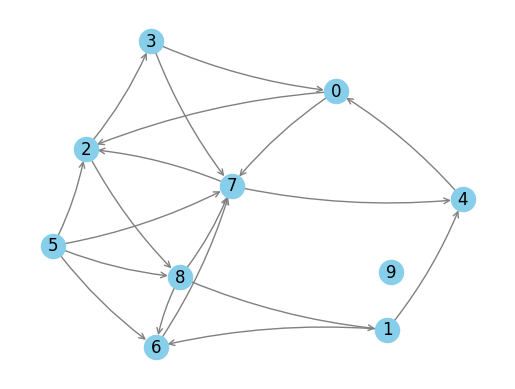

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# assuming g is a torch int/bool adjacency matrix on CPU
# e.g. g = (torch.rand(n,n) < p).int()
A = g.cpu().numpy()        # convert to numpy
G = nx.DiGraph(A) # undirected; use create_using=nx.DiGraph() for directed

pos = nx.kamada_kawai_layout(G)  # layout (try nx.kamada_kawai_layout, nx.circular_layout, ...)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="skyblue")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(
    G, pos,
    arrowstyle="->",
    arrowsize=10,
    edge_color="gray",
    connectionstyle="arc3,rad=0.08",  # slight curve so arrows are visible
    arrows=True
)
plt.axis("off")
plt.show()

In [47]:
Q = set(range(n))
# randomly picking S and G
'''
S = randint(0,n-1)
G = randint(0,n-1)
while G == S:
    G = randint(0,n-1)
'''
# manually set S and G for consistent testing
S = 0
G = 4
print(Q, S, G)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 0 4


In [54]:
V = []
V.append(set([S]))
k = 0
visited = set()
predecessor = dict()
predecessor[S] = None

def successors(u):
    succ = set()
    for v in Q:
        if g[u][v] == 1:
            succ.add(v)
    return succ

while G not in V[k] and len(V[k]) >0:
    V.append(set())
    print("V[",k,"] =", V[k])
    for u in V[k]:
        visited.add(u)
        print("  exploring node", u, "with successors", successors(u))
        for v in successors(u):
            if v not in visited:
                V[k+1].add(v)
                predecessor[v] = u
    k = k + 1

if V[k] == set():
    print("No path from S to G")
else:
    print("Path found from S to G")
    path = []
    node = G
    while node is not None:
        path.append(node)
        node = predecessor[node]
    path.reverse()
    print("Path:", path)

V[ 0 ] = {0}
  exploring node 0 with successors {2, 7}
V[ 1 ] = {2, 7}
  exploring node 2 with successors {8, 3}
  exploring node 7 with successors {2, 4}
V[ 2 ] = {8, 3, 4}
  exploring node 8 with successors {1, 6, 7}
  exploring node 3 with successors {0, 7}
  exploring node 4 with successors {0}
V[ 3 ] = {1, 6}
  exploring node 1 with successors {4, 6}
  exploring node 6 with successors {7}
V[ 4 ] = {6}
  exploring node 6 with successors {7}
No path from S to G
